In [1]:
#Importing Libraries for Data Cleaning, Reviewing and Visualisation

In [2]:
import numpy as np
import pandas as pd
# Visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the Pokemon Dataset
poke = pd.read_csv("Pokemon.csv")
# Displaying first 5 data entries
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Displaying Last 5 records
poke.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
# Shape of the Dataset i.e Dimensions of the dataset
poke.shape


(800, 13)

In [6]:
# Descrbing the Dataset with useful information about the entries
poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
# Checking for the null values
poke.isna().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [8]:
poke.fillna(0,inplace=True)
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False


In [9]:
poke.value_counts("Type 1")

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
dtype: int64

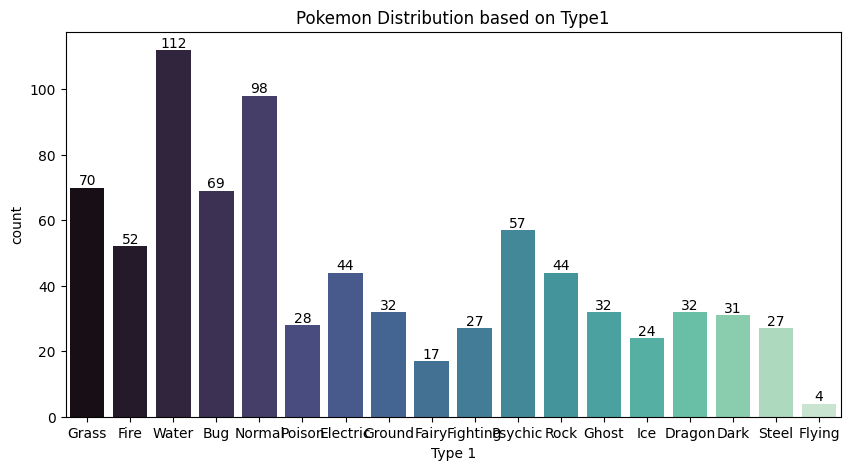

In [10]:
# Plotting the pokemon count by Type 1
plt.figure(figsize = (10,5))
plt.title("Pokemon Distribution based on Type1")
ax = sns.countplot(data = poke, x = 'Type 1', palette = 'mako')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

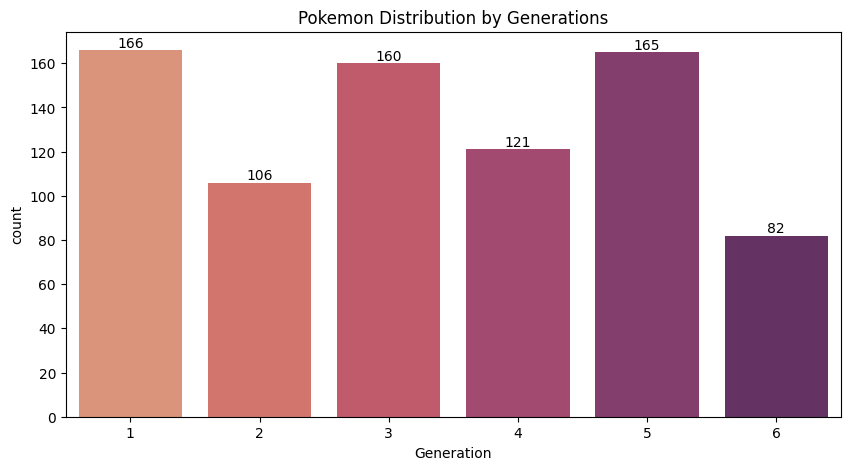

In [11]:
# Plotting Generation-wise pokemon count
plt.figure(figsize=(10, 5))
plt.title("Pokemon Distribution by Generations")
ax = sns.countplot(data = poke, x = 'Generation',palette = 'flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

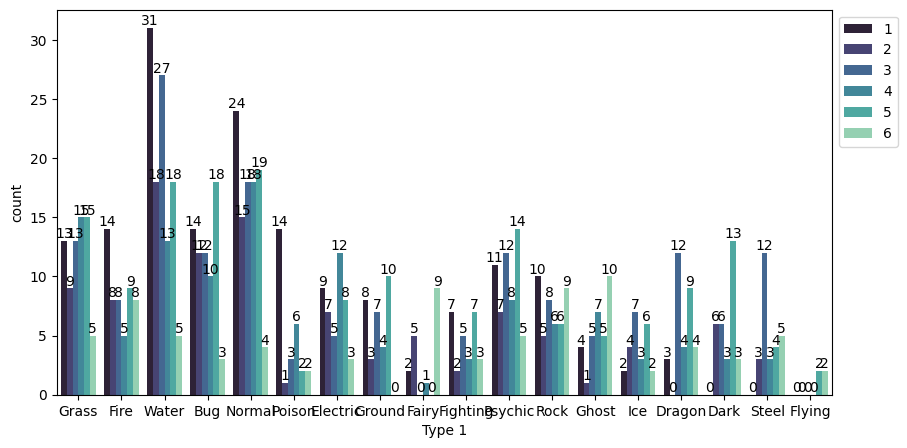

In [12]:
# Pokemon Distribution over Generation by Type1
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Type 1', data=poke, palette='mako', hue='Generation')
# adding count at the top of bars
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
for label in ax.containers:
    ax.bar_label(label)
plt.show()


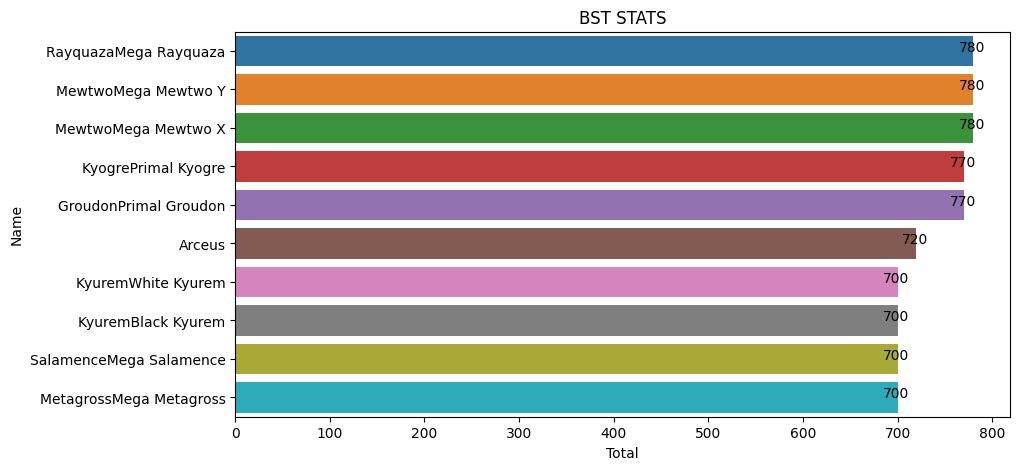

In [13]:
# BST top 10 stats distribution
plt.figure(figsize= (10,5))
plt.title("BST STATS")
ax = poke.sort_values(by = 'Total', ascending= False).reset_index()[:10]
pk = sns.barplot(y = ax["Name"], x = ax["Total"])
for index, row in ax.iterrows():
    plt.annotate(row['Total'], xy = (row['Total']-15,index), color = 'black')
plt.show()


For the highest Total stat is a tie between both Mega-Mewtwo formes and Mega-Rayquaza. Surely try to get one of them in your team.

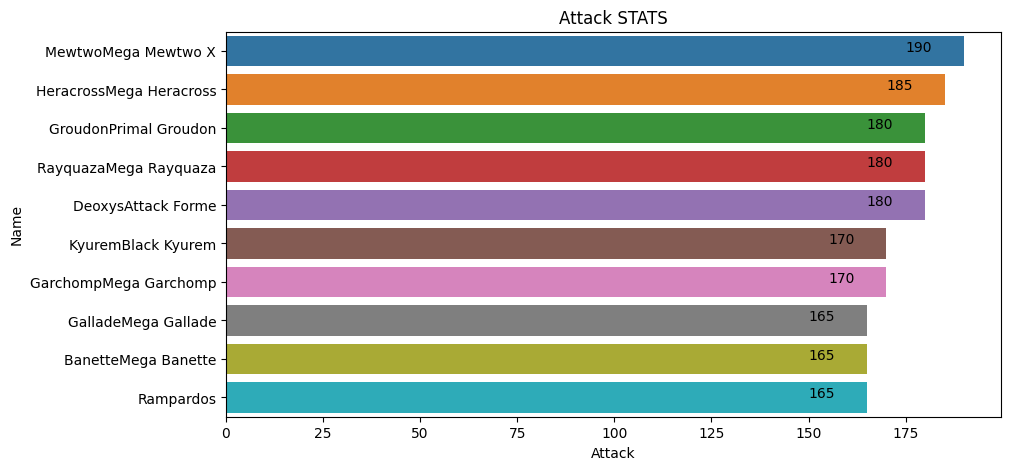

In [14]:
# top 10 Atk stats distribution
plt.figure(figsize=(10, 5))
plt.title("Attack STATS")
ax = poke.sort_values(by='Attack', ascending=False).reset_index()[:10]
pk = sns.barplot(y=ax["Name"], x=ax["Attack"])
for index, row in ax.iterrows():
    plt.annotate(row['Attack'], xy=(row['Attack']-15, index), color='black')
plt.show()


Mega-Mewtwo-X got the highest Attack Stat along with a good speed stat, with Mega-Heracross at second but you'd have to compromise at speed with him. Primal-Groudon surely is a versatile choice

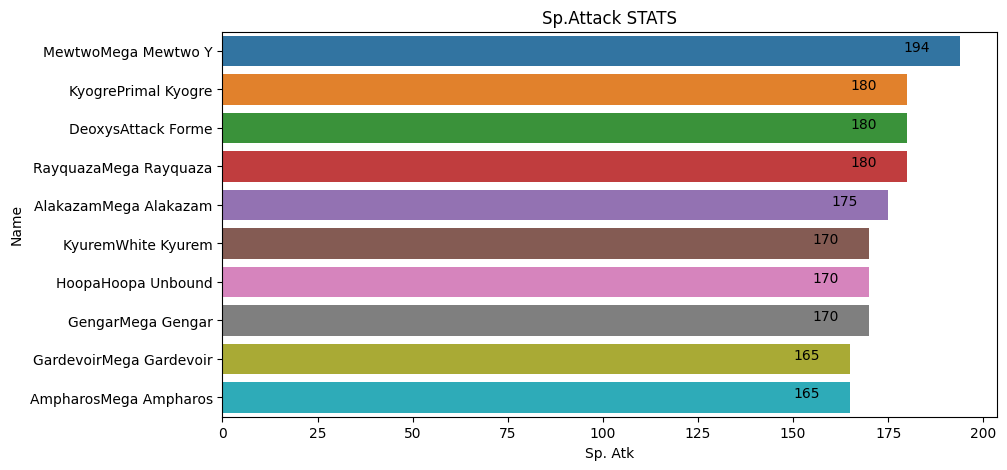

In [15]:
# top 10 Sp. Atk  stats distribution
plt.figure(figsize=(10, 5))
plt.title("Sp.Attack STATS")
ax = poke.sort_values(by='Sp. Atk', ascending=False).reset_index()[:10]
pk = sns.barplot(y=ax["Name"], x=ax["Sp. Atk"])
for index, row in ax.iterrows():
    plt.annotate(row['Sp. Atk'], xy=(row['Sp. Atk']-15, index), color='black')
plt.show()


Mega-Mewtwo-Y is ahead by a margin there, you'll surely want to have it on your team if you're looking for a special attacker. Worry not if you don't because Primal Kyogre, Mega-Rayquaza and Deoxys-Attack Forme are there too.

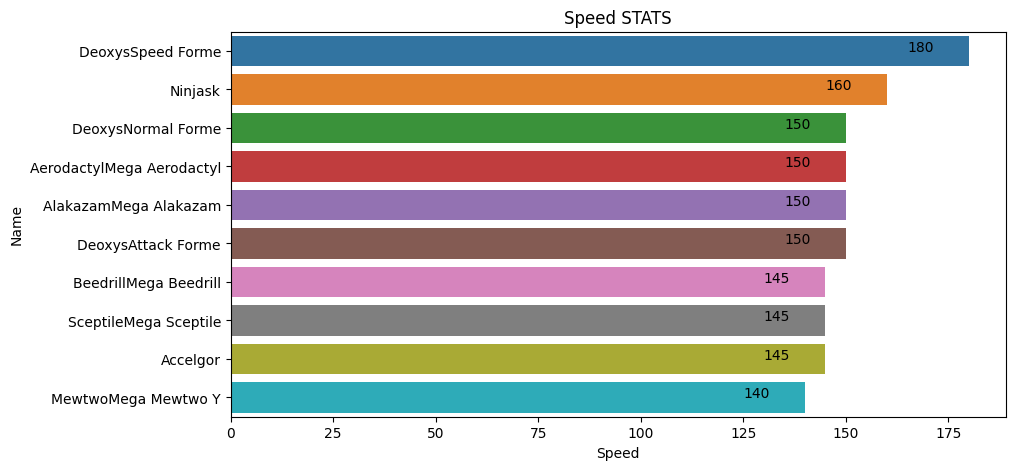

In [16]:
#top 10 speed stats distribution
plt.figure(figsize=(10, 5))
plt.title("Speed STATS")
ax = poke.sort_values(by='Speed', ascending=False).reset_index()[:10]
pk = sns.barplot(y=ax["Name"], x=ax["Speed"])
for index, row in ax.iterrows():
    plt.annotate(row['Speed'], xy=(row['Speed']-15, index), color='black')
plt.show()


Deoxys-Speed Forme takes the cake for the speed stat by huge margin there, ninjask also is faster than many.
4 are tied at 150 max and 3 are tied at 145.

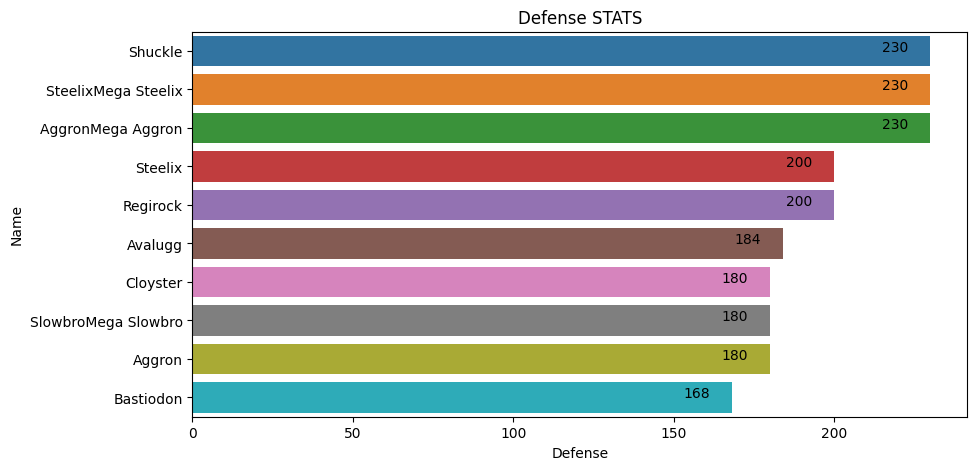

In [17]:
# top 10 Defense stats distribution
plt.figure(figsize=(10, 5))
plt.title("Defense STATS")
ax = poke.sort_values(by='Defense', ascending=False).reset_index()[:10]
pk = sns.barplot(y=ax["Name"], x=ax["Defense"])
for index, row in ax.iterrows():
    plt.annotate(row['Defense'], xy=(row['Defense']-15, index), color='black')
plt.show()


It's a tie for Shuckle and Mega-Steelix and Mega-Aggron, surely they can tank one too many hits.

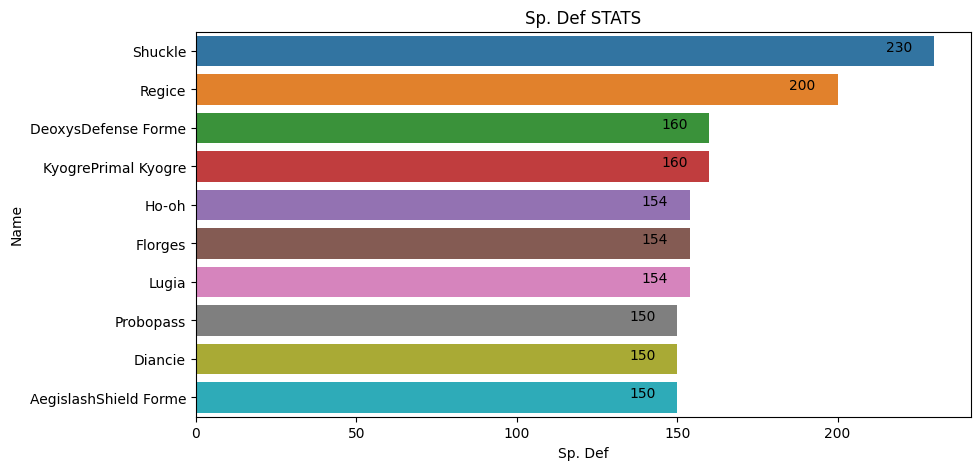

In [18]:
# top 10 Sp. Def stats distribution
plt.figure(figsize=(10, 5))
plt.title("Sp. Def STATS")
ax = poke.sort_values(by='Sp. Def', ascending=False).reset_index()[:10]
pk = sns.barplot(y=ax["Name"], x=ax["Sp. Def"])
for index, row in ax.iterrows():
    plt.annotate(row['Sp. Def'], xy=(row['Sp. Def']-15, index), color='black')
plt.show()


We see that Shuckle leads in both Defense stats and Sp. Def stats, maybe he's a tough nut to crack.

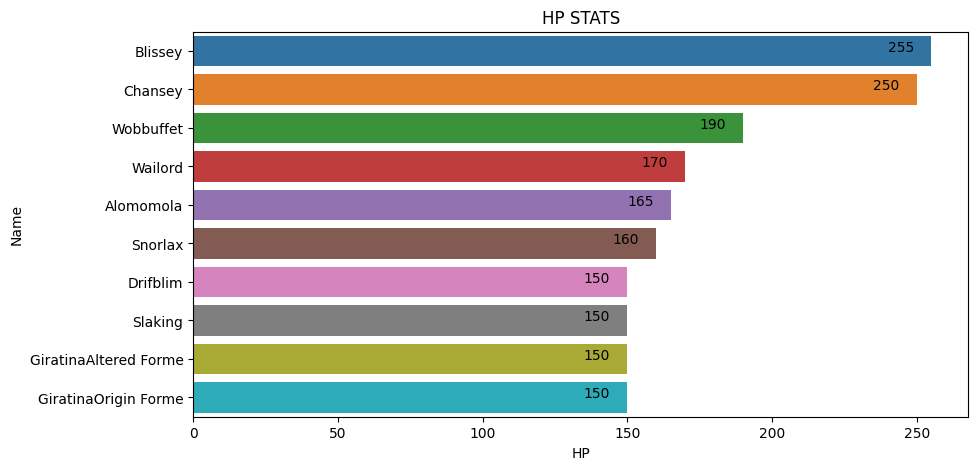

In [19]:
# top 10 Sp. Def stats distribution
plt.figure(figsize=(10, 5))
plt.title("HP STATS")
ax = poke.sort_values(by='HP', ascending=False).reset_index()[:10]
pk = sns.barplot(y=ax["Name"], x=ax["HP"])
for index, row in ax.iterrows():
    plt.annotate(row['HP'], xy=(row['HP']-15, index), color='black')
plt.show()


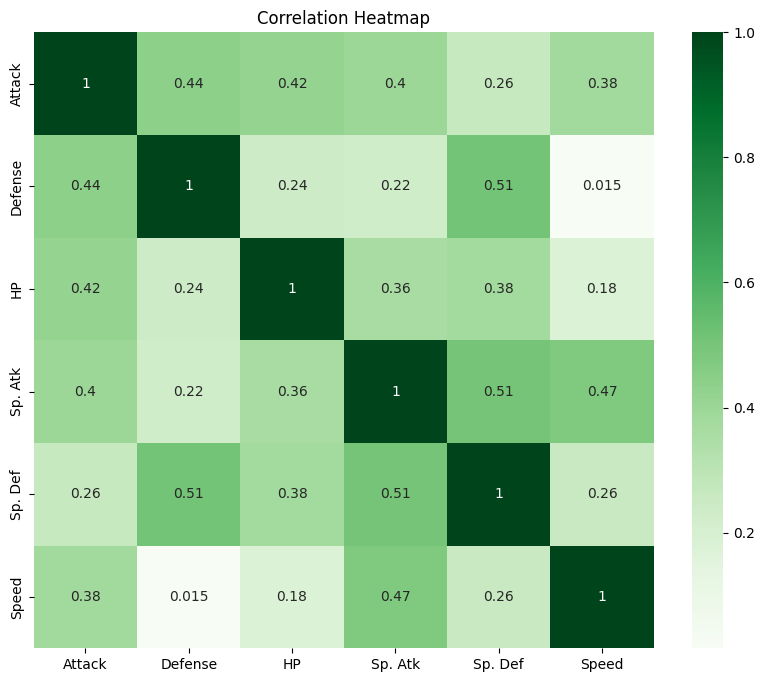

In [20]:
# Correlation Heatmap of STATS
pairs = poke[['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed']]
corr = pairs.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, cmap='Greens')
ax.set_title("Correlation Heatmap")
plt.show()


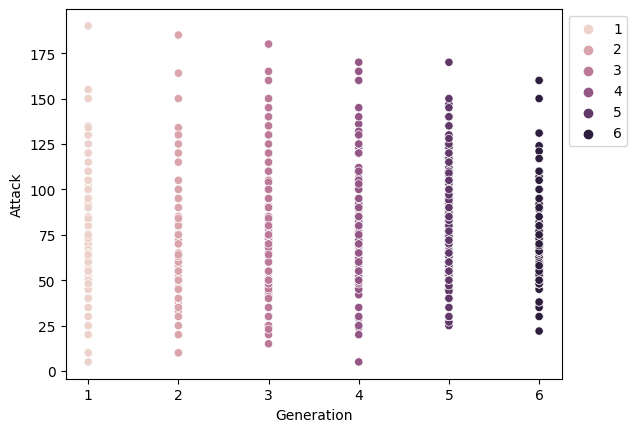

In [21]:
sns.scatterplot(x='Generation', y='Attack',
                hue='Generation', data=poke,)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above scatter plot we can see that:
Generation 1 has highest Attack stat, and Generation 2 coming at second followed by Generation 3 then 4 and 5

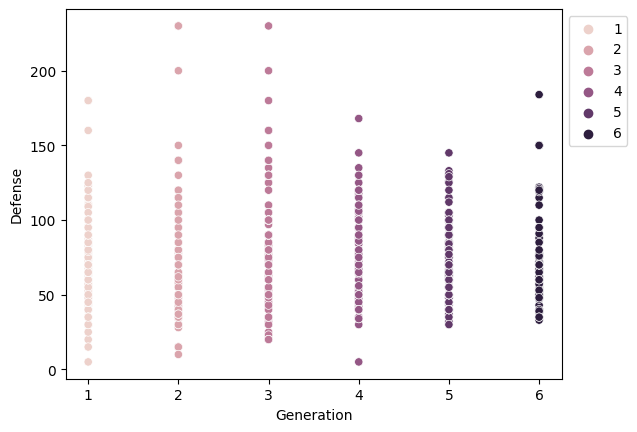

In [22]:
sns.scatterplot(x='Generation', y='Defense',
                hue='Generation', data=poke, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above scatter plot we can see that:
Generation 2 has highest Defense stat, and Generation 3 coming at second.

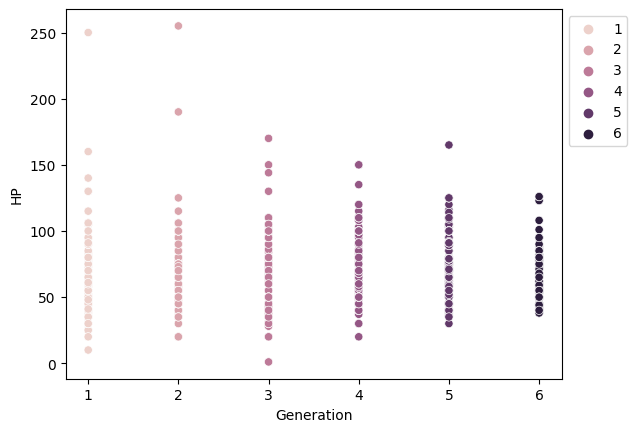

In [23]:
sns.scatterplot(x='Generation', y='HP',
                hue='Generation', data=poke, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above scatter plot we can see that:
Generation 2 has highest HP stat, and Generation 1 coming at second.

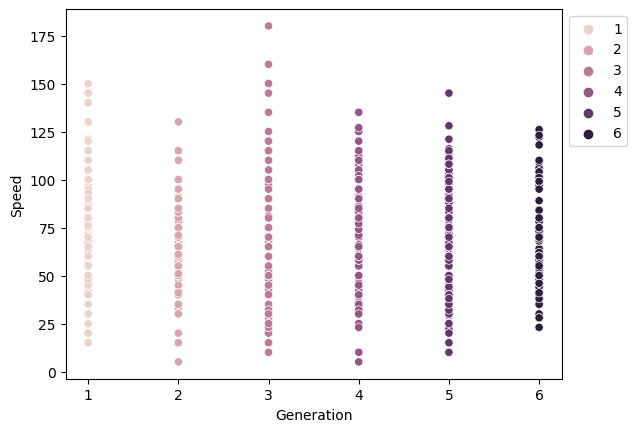

In [24]:
sns.scatterplot(x='Generation', y='Speed',
                hue='Generation', data=poke, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above scatter plot we can see that:
Generation 3 has highest Speed stat, and Generation 1 coming at second followed by Generation 5.

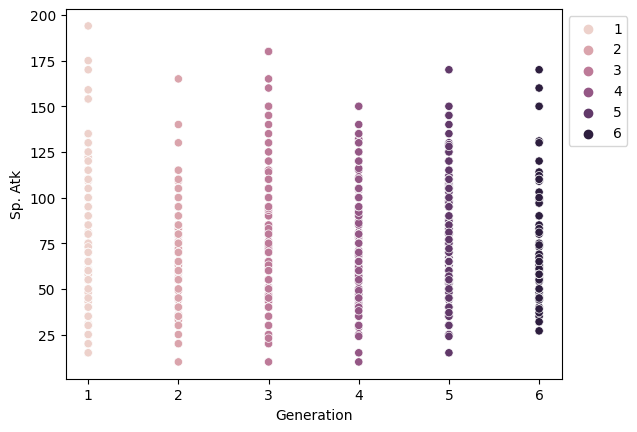

In [25]:
sns.scatterplot(x='Generation', y='Sp. Atk',
                hue='Generation', data=poke, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above scatter plot we can see that:
Generation 1 has highest Sp. Attack stat, and Generation 3 coming at second followed by Generation 5 and 6.


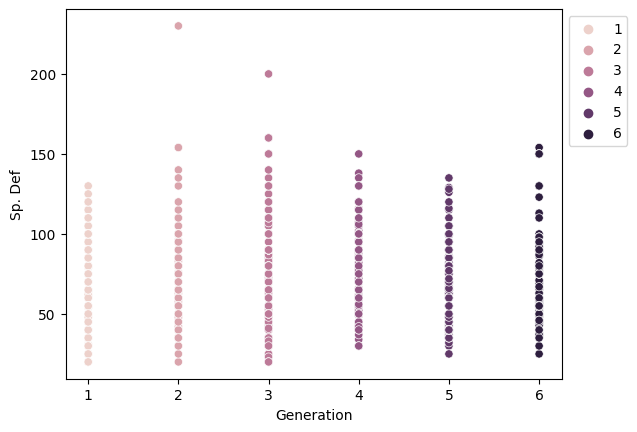

In [26]:
sns.scatterplot(x='Generation', y='Sp. Def',
                hue='Generation', data=poke, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above scatter plot we can see that:
Generation 2 has highest Sp. Def stat, and Generation 3 coming at second.

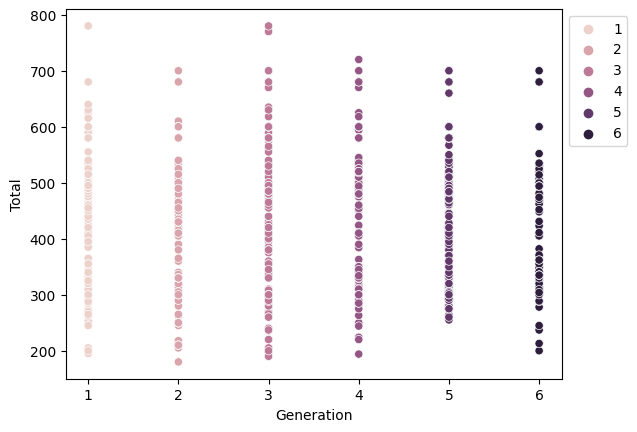

In [27]:
sns.scatterplot(x='Generation', y='Total',
                hue='Generation', data=poke, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above scatter plot we can see that, Total stats are concentrated between 350-560 for most Generations.
Generation 1 and 3 have highest of Totals 
Generation 1, 2, 3, 4, and 6 have lowest Total stat